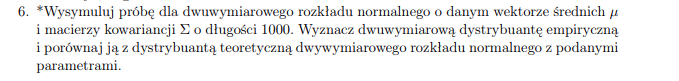

In [146]:
import numpy as np

In [147]:
mean = [1,2]
cov = [[2,1], [1,2]]
sigma = np.matrix(cov)
mi = np.matrix(mean).reshape(2,1)

W pierwszym kroku będziemy chcieli znaleźć macierz dolnotrójkątną $\textbf{A}$ taką, że $\textbf{A}\textbf{A}^T = \Sigma$. Weźmy 
$$ \textbf{A} = 
\begin{bmatrix}
a_{11} & 0 \\
a_{21} & a_{22}
\end{bmatrix}
$$
I przyrównajmy 
$$
\textbf{A} \textbf{A}^T = 
\begin{bmatrix}
a_{11} & 0 \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
a_{11} & a_{21} \\
0 & a_{22}
\end{bmatrix} 
=
\begin{bmatrix}
a_{11}^2 & a_{21}a_{11} \\
a_{21}a_{11} & a_{22}^2 + a_{21}^2
\end{bmatrix} 
=
\begin{bmatrix}
s_{11} & s_{12} \\
s_{21} & s_{22}
\end{bmatrix} = \Sigma
$$
Stąd mamy 

\begin{equation*}
\begin{split}
a_{11} &= \sqrt{s_{11}} \\
a_{21} &= \frac{s_{21}}{a_{11}} \\
a_{22} &= \sqrt{s_{22} - a_{21}^2}

\end{split}
\end{equation*}


In [156]:
def cholesky_decomposition(sigma):
    s11 = sigma.item((0,0))
    s12 = sigma.item((0,1))
    s21 = sigma.item((1,0))
    s22 = sigma.item((1,1))
    a11 = np.sqrt(s11)
    a21 = s21/a11
    a22 = np.sqrt(s22 - a21**2)
    return np.matrix([[a11, 0], [a21, a22]])

W drugim kroku generujemy $n$ wektorów dwuwymiarowych $\textbf{Z}_i$, których składowe to niezależne zmienne losowe o standardowym rozkładzie normalnym.

In [157]:
n = 1000
Z = np.random.normal(loc = 0, scale = 1, size = 2 * n).reshape(2,n)
A = cholesky_decomposition(sigma)

Aby otrzymać szukane wektory $\textbf{X}_i$ o rozkładzie dwuwymiarowym normalnym wystarczy wykonać przekształcenie
$$
\textbf{X}_i = \mu + \textbf{A}\textbf{Z}_i
$$

In [164]:
X = np.array((mi + np.dot(A, Z)).reshape(n, 2))


Poniżej znajduje się funkcja wyliczająca wartość dystrybuanty empirycznej X

In [165]:
t1 = np.linspace(-4,4,1000)
t2 = np.linspace(-4,4,1000)
T1, T2 = np.meshgrid(t1, t2)
pos1 = np.dstack((T1, T2))


def ecdf(sample, pos):
    result = np.zeros_like(pos[:, :, 0])
    for i in range(len(pos)):
        for j in range(len(pos[i])):
            result[i][j] = np.mean((sample[:, 0] <= pos[i][j][0]) & (sample[:, 1] <= pos[i][j][1]))
    return result

In [166]:
empirical = ecdf(X, pos1)

In [154]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from matplotlib import cm

Tworzenie wykresu 3D dystrybuanty empirycznej

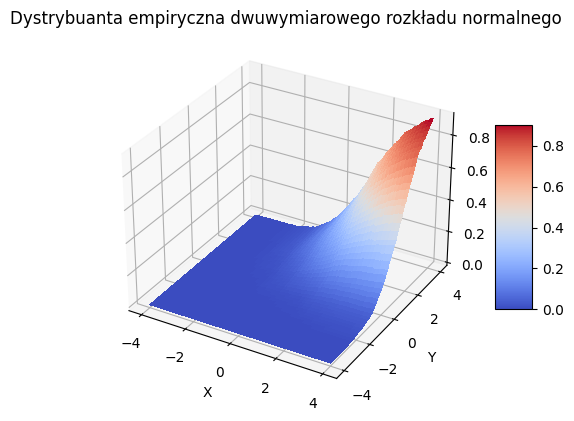

In [167]:


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


x1 = np.linspace(-4, 4, 1000)
y1 = np.linspace(-4, 4, 1000)
X1, Y1 = np.meshgrid(x1, y1)
pos2 = np.dstack((X1, Y1))

surf = ax.plot_surface(X1, Y1, empirical, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dystrybuanta empiryczna dwuwymiarowego rozkładu normalnego')
plt.show()

Tworzenie wykresu 3D dystrybuanty teoretycznej

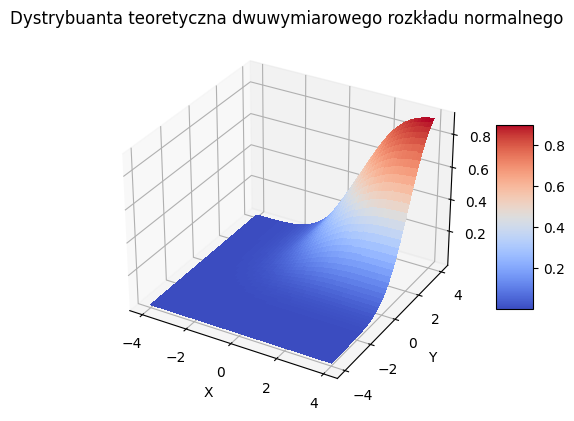

In [169]:



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

bivariate_normal = multivariate_normal(mean=mean, cov=cov)


x = np.linspace(-4, 4, 1000)
y = np.linspace(-4, 4, 1000)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))


Z = bivariate_normal.cdf(pos)


surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dystrybuanta teoretyczna dwuwymiarowego rozkładu normalnego')
plt.show()